In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import sklearn
from sklearn.linear_model import LogisticRegression
import sklearn.ensemble as ske
from sklearn import datasets, svm, cross_validation, tree, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib as plt
%matplotlib inline 

/home/zectrosan/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Training Data is imported
train = pd.read_csv("./data/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Testing Data is imported
test = pd.read_csv("./data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# Assigned Integer values to Male and female
genders = {"male": 1, "female": 0}
train["SexF"] = train["Sex"].apply(lambda s: genders.get(s))
test["SexF"] = test["Sex"].apply(lambda s: genders.get(s))

In [5]:
train["SexF"].head()

0    1
1    0
2    0
3    0
4    1
Name: SexF, dtype: int64

### Data Analysis 
Analysing the data to check which passenger class and which gender has the highest survival count

In [6]:
# Calculating the average number of passengers per Class that survived
titanic = train.groupby('Pclass').mean()
titanic

,PassengerId,Survived,Age,SibSp,Parch,Fare,SexF
Pclass,,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687,0.564815
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183,0.586957
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550,0.706721


In [7]:
# Calculating the average number of passengers per Class and Sex that survived
class_sex_grouping = train.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  SexF  
Pclass Sex                       
1      female  106.125798   0.0  
       male     67.226127   1.0  
2      female   21.970121   0.0  
       male     19.741782   1.0  
3      female   16.118810   0.0  
       male     12.661633   1.0

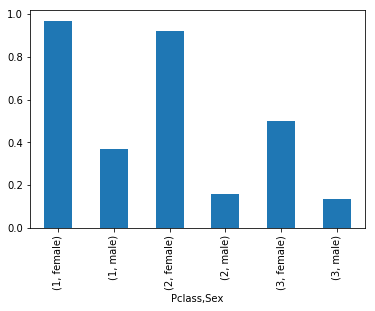

In [8]:
class_sex_grouping['Survived'].plot(kind="bar")

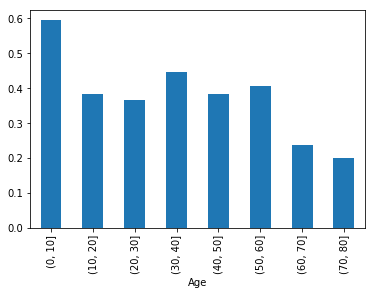

In [9]:
# To check the survival count of people of different age groups
group_by_age = pd.cut(train["Age"], np.arange(0, 90, 10))
age_grouping = train.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

### Cleaning of Dataset
Training Data needs to be cleaned of NaN values for ensuring efficient training of classifier whereas the NaN data of Test dataset needs to be replaced by some number as they can't be removed as per the requirement.

We have 2 possibilities to replace the NaN values of the test data.

1). With *mean* value

2). With *median* value

Replacing median values gives almost good accuracy as compared to mean, so here median value is calculated and the NaN value is replaced

In [10]:
median_ages_train = np.zeros((2,3))

In [11]:
# Calculating the median from the given data
for i in range(0,2):
    for j in range(0,3):
        median_ages_train[i,j] = train[(train['SexF'] == i) & (train['Pclass'] == j+1)]['Age'].dropna().median()
        
median_ages_train

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [12]:
train['AgeFill'] = train['Age']
train[train['Age'].isnull()][['Age', 'AgeFill', 'SexF', 'Pclass']].head(10)
 
for i in range(0, 2):
    for j in range(0, 3):
        train.loc[(train.Age.isnull()) & (train.SexF == i) & (train.Pclass == j+1),'AgeFill'] = median_ages_train[i,j]

In [13]:
# Dropping the unwanted columns and also the NaN values from the Training dataset
train_new = train.drop(['Cabin','Name','Ticket','Sex','Embarked','Age'], axis=1)
train_new = train_new.dropna(axis=0, how='any')
train_new.count()

PassengerId    891
Survived       891
Pclass         891
SibSp          891
Parch          891
Fare           891
SexF           891
AgeFill        891
dtype: int64

In [14]:
# Separating the features and labels
X = train_new.drop(['Survived'], axis=1).values
y = train_new['Survived'].values

In [15]:
# For test.csv
median_ages_test = np.zeros((2,3))

In [16]:
# Calculating the median for test data from the given data
for i in range(0,2):
    for j in range(0,3):
        median_ages_test[i,j] = test[(test['SexF'] == i) & (test['Pclass'] == j+1)]['Age'].dropna().median()
        
median_ages_test

array([[ 41.,  24.,  22.],
       [ 42.,  28.,  24.]])

In [17]:
test['AgeFill'] = test['Age']
test[test['Age'].isnull()][['Age', 'AgeFill', 'SexF', 'Pclass']].head(10)
 
for i in range(0, 2):
    for j in range(0, 3):
        test.loc[(test.Age.isnull()) & (test.SexF == i) & (test.Pclass == j+1),'AgeFill'] = median_ages_test[i,j]

In [18]:
# Dropping the unwanted columns and also the NaN values from the Test dataset
test_new = test.drop(['Cabin','Name','Ticket','Sex','Embarked','Age'], axis=1)
test_new = test_new.dropna(axis=0, how='any')
test_new.count()

PassengerId    417
Pclass         417
SibSp          417
Parch          417
Fare           417
SexF           417
AgeFill        417
dtype: int64

### Data Splitting
It is a good practise to split the *Training Data* into training and validation data in the ratio 4:1. The Training data is used for trianing purpose whereas the validation data is used to validate the accuracy score fo our trained classifier.
Below the training data is splitted up randomly in the ratio 4:1.

In [19]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

### Selection of Classifier

Here 4 classifiers are used to train the data, namely, *Decission Tree*, *AdaBoost*, *Gradient Boosting* and  *Random Forest*.

In [20]:
# Decission Tree Classifier
clf_dt = tree.DecisionTreeClassifier(max_depth=10)
clf_dt.fit(X_train, y_train)
clf_dt.score(X_test, y_test)

0.75418994413407825

In [21]:
# AdaBoost Classifier
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),algorithm="SAMME",n_estimators=50)
bdt.fit(X_train, y_train)
bdt.score(X_test, y_test)

0.83240223463687146

In [22]:
# Gradient Boosting Classifier
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
clf_gb.fit(X_train, y_train)
clf_gb.score(X_test, y_test)

0.84916201117318435

In [23]:
#Random Forest Classifier
clf_rf = ske.RandomForestClassifier(n_estimators=50)
clf_rf.fit(X_train, y_train)
clf_rf.score(X_test, y_test)

0.83798882681564246

As we can see the ** *Gradient Boosting Classifier* ** and ** *Random Forest Classifier* ** are producing a relatively high accuracy score, so it is used to predict the test values and corresponding output.csv files are produced.

In [24]:
# Prediction by Random Forest Classifier
prediction_rf = clf_rf.predict(test_new.values)

In [25]:
# Creating a Dataframe to store the predicted Data
df_output_rf = pd.DataFrame({
    'PassengerId' : test_new.PassengerId.values,
    'Survived': prediction_rf
})

In [26]:
# Writing the output to a csv file
df_output_rf.to_csv("./output/output_rf.csv", sep=',')

In [27]:
# Prediction by Gradient Boosting classifier
prediction_gb = clf_gb.predict(test_new.values)

In [28]:
# Creating a Dataframe to store the predicted Data
df_output_gb = pd.DataFrame({
    'PassengerId' : test_new.PassengerId.values,
    'Survived': prediction_gb
})

In [29]:
# Writing the output to a csv file
df_output_gb.to_csv("./output/output_gb.csv", sep=',')